In [13]:
import hydra
import sys
import torch

sys.path.append("..")

from gnn_ssl.datasets import DistributedArrayDataset
from gnn_ssl.feature_extractors import ArrayWiseSpatialLikelihoodGrid

from pysoundloc.pysoundloc.visualization import plot_grid

dataset_path = "/Users/ezajlerg/datasets/current_work/44100"

dataset = DistributedArrayDataset(dataset_path)
dataloader = torch.utils.data.DataLoader(
        dataset,
        batch_size=1,
        shuffle=True
    )



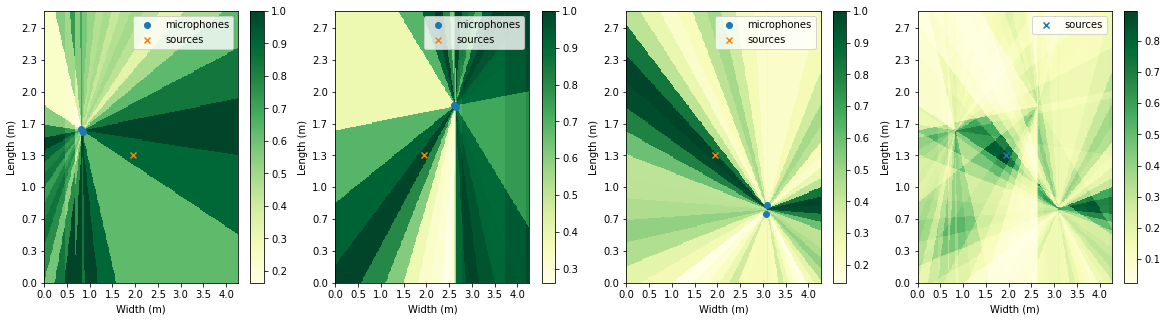

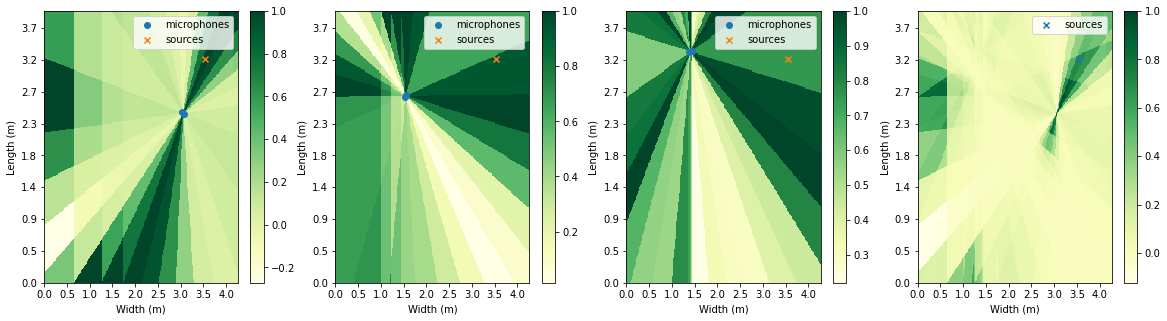

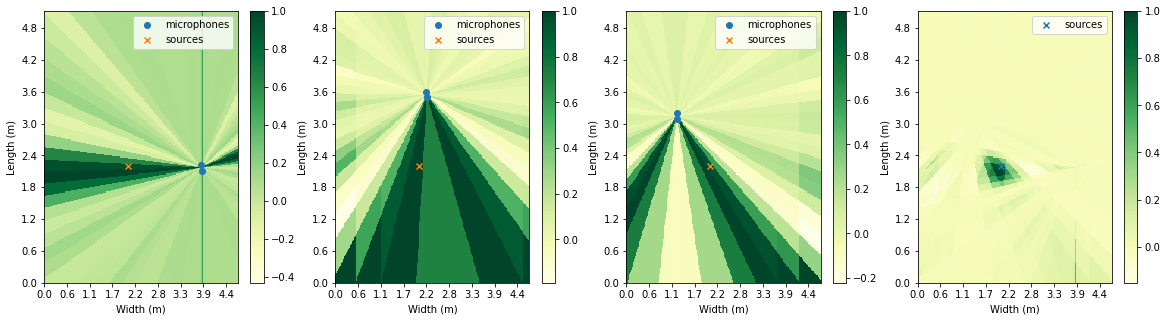

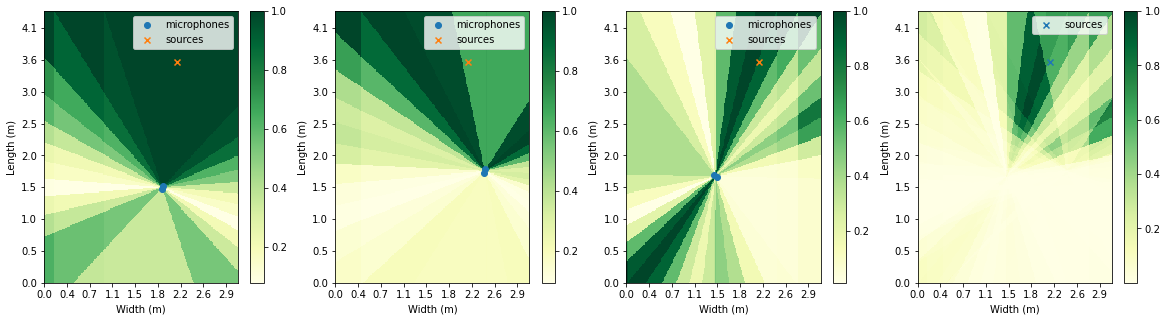

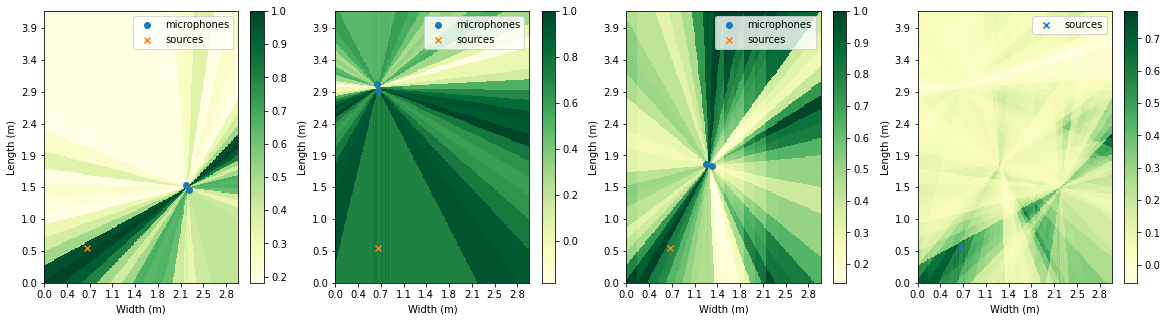

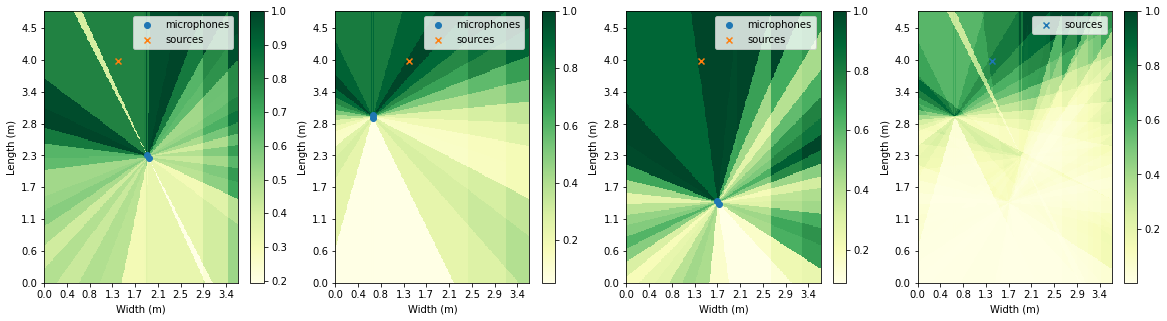

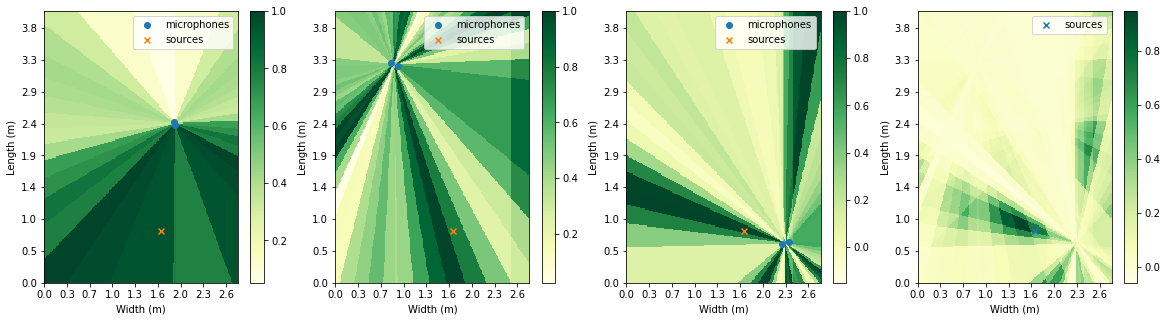

In [35]:
import matplotlib.pyplot as plt

feature_extractor = ArrayWiseSpatialLikelihoodGrid(44100, 256, flatten=False, thickness=1)

for b, data in enumerate(dataloader):
    x, y = data
    grids = feature_extractor(x)
    
    fig, axs = plt.subplots(ncols=4, figsize=(20, 5))
    
    for i in range(3):
        plot_grid(grids["signal"][0, i], x["global"]["room_dims"][0],
                  source_coords=y["source_coordinates"],
                  microphone_coords=x["local"]["mic_coordinates"][0][i], ax=axs[i])
    plot_grid(grids["signal"][0].prod(axis=0), x["global"]["room_dims"][0],
          source_coords=y["source_coordinates"], ax=axs[3])#,
          #microphone_coords=x["local"]["mic_coordinates"][0])

        
    plt.show()
    if b > 5:
        break